In [5]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [2]:
base_model_name = 'inception' 
base_model = tf.keras.models.load_model(f'model/{base_model_name}')

Metal device set to: Apple M2


2023-02-11 21:06:20.484448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-11 21:06:20.484845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
def get_img(img_path, image_size=299):
    preprocess_input = tf.keras.applications.inception_v3.preprocess_input
    img = tf.keras.preprocessing.image.load_img(img_path, 
                                                target_size = (image_size,image_size))
    img = tf.keras.utils.img_to_array(img) 
    img = preprocess_input(img)
    return img

  0%|          | 0/1001 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       akiec       0.68      0.55      0.61        31
         bcc       0.81      0.72      0.76        54
         bkl       0.59      0.78      0.67       117
          df       0.67      0.43      0.52        14
         mel       0.51      0.69      0.59       103
          nv       0.95      0.87      0.91       663
        vasc       0.95      0.95      0.95        19

    accuracy                           0.82      1001
   macro avg       0.74      0.71      0.72      1001
weighted avg       0.84      0.82      0.83      1001



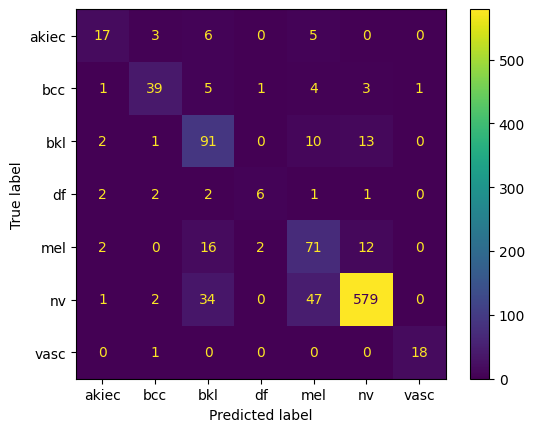

In [15]:
test_df = pd.read_csv('data/test_truth.csv')
y_true, y_pred = [], []

labels = np.unique(list(test_df['dx']))
class_label = {name : idx for idx, name in enumerate(labels)}

for _, row in tqdm(test_df.iterrows(), total = len(test_df)):    
    img_path = row['image_id']
    img = get_img(f'data/test/{img_path}.jpg').reshape(-1, 299,299, 3)

    label = class_label[row['dx']]

    pred = np.argmax(base_model(img))  
    
    y_true.append(label)
    y_pred.append(pred)

print(classification_report(y_true, y_pred, target_names=class_label))

matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels = list(class_label.keys()))
disp.plot()